# <center> Проект 3. EDA + Feature Engineering. Соревнование на Kaggle

## Постановка задачи

Представьте, что вы работаете датасаентистом в компании Booking. Одна из проблем компании — это нечестные отели, которые накручивают себе рейтинг. Одним из способов нахождения таких отелей является построение модели, которая предсказывает рейтинг отеля. Если предсказания модели сильно отличаются от фактического результата, то, возможно, отель играет нечестно, и его стоит проверить.

Вам поставлена задача создать такую модель.

Первоначальная версия датасета содержит 17 полей со следующей информацией:

* hotel_address — адрес отеля;
* review_date — дата, когда рецензент разместил соответствующий отзыв;
* average_score — средний балл отеля, рассчитанный на основе последнего комментария за последний год;
* hotel_name — название отеля;
* reviewer_nationality — страна рецензента;
* negative_review — отрицательный отзыв, который рецензент дал отелю;
* review_total_negative_word_counts — общее количество слов в отрицательном отзыв;
* positive_review — положительный отзыв, который рецензент дал отелю;
* review_total_positive_word_counts — общее количество слов в положительном отзыве.
* reviewer_score — оценка, которую рецензент поставил отелю на основе своего опыта;
* total_number_of_reviews_reviewer_has_given — количество отзывов, которые рецензенты дали в прошлом;
* total_number_of_reviews — общее количество действительных отзывов об отеле;
* tags — теги, которые рецензент дал отелю;
* days_since_review — количество дней между датой проверки и датой очистки;
* additional_number_of_scoring — есть также некоторые гости, которые просто поставили оценку сервису, но не оставили отзыв. Это число указывает, сколько там действительных оценок без проверки.
* lat — географическая широта отеля;
* lng — географическая долгота отеля.

Файлы для соревнования:

* hotels_train.csv - набор данных для обучения
* hotels_test.csv - набор данных для оценки качества
* submission.csv - файл сабмишна в нужном формате

## Загрузка данных

In [46]:
# загружаем необходимые библиотеки
import numpy as np 
import pandas as pd 
import category_encoders as ce
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import os

In [3]:
# загружаем датасет
hotels_test = pd.read_csv('hotels_test.csv')
hotels_train = pd.read_csv('hotels_train.csv')
submission = pd.read_csv('submission.csv')

In [4]:
hotels_test.head()

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,tags,days_since_review,lat,lng
0,Via Senigallia 6 20161 Milan Italy,904,7/21/2017,8.1,Hotel Da Vinci,United Kingdom,Would have appreciated a shop in the hotel th...,52,16670,Hotel was great clean friendly staff free bre...,62,1,"[' Leisure trip ', ' Couple ', ' Double Room '...",13 days,45.533137,9.171102
1,Arlandaweg 10 Westpoort 1043 EW Amsterdam Neth...,612,12/12/2016,8.6,Urban Lodge Hotel,Belgium,No tissue paper box was present at the room,10,5018,No Positive,0,7,"[' Leisure trip ', ' Group ', ' Triple Room ',...",234 day,52.385649,4.834443
2,Mallorca 251 Eixample 08008 Barcelona Spain,46,11/26/2015,8.3,Alexandra Barcelona A DoubleTree by Hilton,Sweden,Pillows,3,351,Nice welcoming and service,5,15,"[' Business trip ', ' Solo traveler ', ' Twin ...",616 day,41.393192,2.161520
3,Piazza Della Repubblica 17 Central Station 201...,241,10/17/2015,9.1,Hotel Principe Di Savoia,United States of America,No Negative,0,1543,Everything including the nice upgrade The Hot...,27,9,"[' Leisure trip ', ' Couple ', ' Ambassador Ju...",656 day,45.479888,9.196298
4,Singel 303 309 Amsterdam City Center 1012 WJ A...,834,5/16/2016,9.1,Hotel Esther a,United Kingdom,No Negative,0,4687,Lovely hotel v welcoming staff,7,2,"[' Business trip ', ' Solo traveler ', ' Class...",444 day,52.370545,4.888644


In [5]:
hotels_train.head()

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,reviewer_score,tags,days_since_review,lat,lng
0,Stratton Street Mayfair Westminster Borough Lo...,581,2/19/2016,8.4,The May Fair Hotel,United Kingdom,Leaving,3,1994,Staff were amazing,4,7,10.0,"[' Leisure trip ', ' Couple ', ' Studio Suite ...",531 day,51.507894,-0.143671
1,130 134 Southampton Row Camden London WC1B 5AF...,299,1/12/2017,8.3,Mercure London Bloomsbury Hotel,United Kingdom,poor breakfast,3,1361,location,2,14,6.3,"[' Business trip ', ' Couple ', ' Standard Dou...",203 day,51.521009,-0.123097
2,151 bis Rue de Rennes 6th arr 75006 Paris France,32,10/18/2016,8.9,Legend Saint Germain by Elegancia,China,No kettle in room,6,406,No Positive,0,14,7.5,"[' Leisure trip ', ' Solo traveler ', ' Modern...",289 day,48.845377,2.325643
3,216 Avenue Jean Jaures 19th arr 75019 Paris Fr...,34,9/22/2015,7.5,Mercure Paris 19 Philharmonie La Villette,United Kingdom,No Negative,0,607,Friendly staff quiet comfortable room spotles...,11,8,10.0,"[' Leisure trip ', ' Solo traveler ', ' Standa...",681 day,48.888697,2.394540
4,Molenwerf 1 1014 AG Amsterdam Netherlands,914,3/5/2016,8.5,Golden Tulip Amsterdam West,Poland,Torn sheets,4,7586,The staff was very friendly and helpful Break...,20,10,9.6,"[' Business trip ', ' Couple ', ' Standard Dou...",516 day,52.385601,4.847060


In [6]:
submission.head()

,reviewer_score,id
0,1,488440
1,10,274649
2,3,374688
3,10,404352
4,9,451596


In [7]:
# дря корректной обработки признаков объединяем трейн и тест в один датасет
hotels_train['sample'] = 1 # помечаем где у нас трейн
hotels_test['sample'] = 0 # помечаем где у нас тест
hotels_test['reviewer_score'] = 0 # в тесте у нас нет значения reviewer_score, мы его должны предсказать, по этому пока просто заполняем нулями

hotels = hotels_test._append(hotels_train, sort=False).reset_index(drop=True)

In [8]:
hotels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 18 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   hotel_address                               515738 non-null  object 
 1   additional_number_of_scoring                515738 non-null  int64  
 2   review_date                                 515738 non-null  object 
 3   average_score                               515738 non-null  float64
 4   hotel_name                                  515738 non-null  object 
 5   reviewer_nationality                        515738 non-null  object 
 6   negative_review                             515738 non-null  object 
 7   review_total_negative_word_counts           515738 non-null  int64  
 8   total_number_of_reviews                     515738 non-null  int64  
 9   positive_review                             515738 non-null  object 
 

Есть пропуски в столбцах широта и долгота отеля (lat и lng).

In [9]:
# Рассмотрим числовые показатели признаков
hotels.describe()

,additional_number_of_scoring,average_score,review_total_negative_word_counts,total_number_of_reviews,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,lat,lng,sample,reviewer_score
count,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,512470.000000,512470.000000,515738.000000,515738.000000
mean,498.081836,8.397487,18.539450,2743.743944,17.776458,7.166001,49.442439,2.823803,0.749999,6.297672
std,500.538467,0.548048,29.690831,2317.464868,21.804185,11.040228,3.466325,4.579425,0.433014,3.902295
min,1.000000,5.200000,0.000000,43.000000,0.000000,1.000000,41.328376,-0.369758,0.000000,0.000000
25%,169.000000,8.100000,2.000000,1161.000000,5.000000,1.000000,48.214662,-0.143372,0.250000,0.625000
50%,341.000000,8.400000,9.000000,2134.000000,11.000000,3.000000,51.499981,0.010607,1.000000,7.900000
75%,660.000000,8.800000,23.000000,3613.000000,22.000000,8.000000,51.516288,4.834443,1.000000,9.600000
max,2682.000000,9.800000,408.000000,16670.000000,395.000000,355.000000,52.400181,16.429233,1.000000,10.000000


In [10]:
# Рассмотрим числовые показатели признаков
hotels.describe(include='object')

,hotel_address,review_date,hotel_name,reviewer_nationality,negative_review,positive_review,tags,days_since_review
count,515738,515738,515738,515738,515738,515738,515738,515738
unique,1493,731,1492,227,330011,412601,55242,731
top,163 Marsh Wall Docklands Tower Hamlets London ...,8/2/2017,Britannia International Hotel Canary Wharf,United Kingdom,No Negative,No Positive,"[' Leisure trip ', ' Couple ', ' Double Room '...",1 days
freq,4789,2585,4789,245246,127890,35946,5101,2585


Проверка на наличие дубликатов.

In [11]:
# Узнаю сколько дубликатов
mask = hotels.duplicated()
hotels_duplicates = hotels[mask]
print(f'Число найденных дубликатов: {hotels_duplicates.shape[0]}')

Число найденных дубликатов: 336


По условию удалять дубликаты (и вообще удалять строки) запрещено, оставим это без внимания.

Работа с пропущенными значениями.

Заменим пропуски на значение медианы.

In [12]:
hotels['lat'] = hotels['lat'].fillna(hotels['lat'].median())
hotels['lng'] = hotels['lng'].fillna(hotels['lng'].median())

In [13]:
hotels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 18 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   hotel_address                               515738 non-null  object 
 1   additional_number_of_scoring                515738 non-null  int64  
 2   review_date                                 515738 non-null  object 
 3   average_score                               515738 non-null  float64
 4   hotel_name                                  515738 non-null  object 
 5   reviewer_nationality                        515738 non-null  object 
 6   negative_review                             515738 non-null  object 
 7   review_total_negative_word_counts           515738 non-null  int64  
 8   total_number_of_reviews                     515738 non-null  int64  
 9   positive_review                             515738 non-null  object 
 

## Обработка признаков

Обрабатываем признак hotel_address. Из него можно получить город и страну.

In [14]:
# находим все встречающиеся страны
hotels['country'] = hotels['hotel_address'].apply(lambda x: x.split()[-1] if x.split()[-2].lower() != 'united' else ' '.join(x.split()[-2:]))
hotels['country'].unique()

array(['Italy', 'Netherlands', 'Spain', 'United Kingdom', 'France',
       'Austria'], dtype=object)

In [15]:
# находим все встречающиеся города
hotels['city'] = hotels['hotel_address'].apply(lambda x: x.split()[-2] if 'london' not in x.lower() else 'London')
hotels['city'].unique()

array(['Milan', 'Amsterdam', 'Barcelona', 'London', 'Paris', 'Vienna'],
      dtype=object)

Создадим признак is_resident исходя из страны отеля и гражданства гостя

In [16]:
def get_resident(country, nationality):
    if country == nationality.strip(): return 1
    return 0

hotels['is_resident'] = hotels.apply(lambda x: get_resident(x.country, x.reviewer_nationality), axis=1)

In [17]:
#Закодируем страну и город
hotels = pd.get_dummies(hotels, columns=['country'], drop_first=False, dtype=int)
hotels = pd.get_dummies(hotels, columns=['city'], drop_first=False, dtype=int)

Анализируем признак review_date и создаём новые признаки day, month, year, is_christmas_time, is_summer, is_autumn, is_winter, is_spring.

In [18]:
def get_is_christmas_time(day, month):
    if month == 12:
        if day >= 21: return 1
    elif month == 1:
        if day <= 7: return 1
    return 0

hotels['review_date'] = pd.to_datetime(hotels['review_date'], format='%m/%d/%Y')
hotels['day'] = hotels['review_date'].apply(lambda x: x.day)
hotels['month'] = hotels['review_date'].apply(lambda x: x.month)
hotels['year'] = hotels['review_date'].apply(lambda x: x.year)

hotels['is_christmas_time'] = hotels.apply(lambda x: get_is_christmas_time(x.day, x.month), axis=1)
hotels['is_summer'] = hotels['month'].apply(lambda x: 1 if x > 5 and x < 9 else 0)
hotels['is_autumn'] = hotels['month'].apply(lambda x: 1 if x > 8 and x < 12 else 0)
hotels['is_winter'] = hotels['month'].apply(lambda x: 1 if x > 11 or x < 3 else 0)
hotels['is_spring'] = hotels['month'].apply(lambda x: 1 if x > 2 and x < 6 else 0)

Анализируем tags. Создаём признак с количеством ночей проведёных гостем

In [19]:
import re
def extract_night_count(value):
    value = value.split(',')
    for tag_str_list in value:
        tag_list = tag_str_list.strip('[]').split("' '")
        for tag in tag_list:
            tag = tag.lstrip("' ").rstrip(" '")
            if 'Stayed' in tag:
                night_count = re.search(r'\d+', tag)
                if night_count: return int(night_count.group())
              
hotels['night_count'] = hotels['tags'].apply(extract_night_count)
hotels['night_count'].fillna(int(hotels['night_count'].mode().iloc[0]), inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_13672\483490620.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  hotels['night_count'].fillna(int(hotels['night_count'].mode().iloc[0]), inplace=True)


Закодируем информацию из признаков negative_review и positive_review

In [20]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

sid_obj = SentimentIntensityAnalyzer()

def sentiment_score(sentence):
    sentiment_dict = sid_obj.polarity_scores(sentence)
    return sentiment_dict['neg'], sentiment_dict['neu'], sentiment_dict['pos']

In [21]:
hotels['negative_neg'], hotels['negative_neu'], hotels['negative_pos'] = zip(*hotels['negative_review'].apply(sentiment_score))

In [22]:
hotels['positive_neg'], hotels['positive_neu'], hotels['positive_pos'] = zip(*hotels['positive_review'].apply(sentiment_score))

In [23]:
hotels.nunique(dropna=False)

hotel_address                                   1493
additional_number_of_scoring                     480
review_date                                      731
average_score                                     34
hotel_name                                      1492
reviewer_nationality                             227
negative_review                               330011
review_total_negative_word_counts                402
total_number_of_reviews                         1142
positive_review                               412601
review_total_positive_word_counts                365
total_number_of_reviews_reviewer_has_given       198
tags                                           55242
days_since_review                                731
lat                                             1472
lng                                             1472
sample                                             2
reviewer_score                                    38
is_resident                                   

## Отбор признаков

In [24]:
# Выделим тестовую часть
hotels_train = hotels.query('sample == 1').drop(['sample'], axis=1)
hotels_test = hotels.query('sample == 0').drop(['sample'], axis=1)

y = hotels_train.reviewer_score.values            # наш таргет
X = hotels_train.drop(['reviewer_score'], axis=1)

In [25]:
X = X.select_dtypes(include='number')

Оценим какой признак насколько важен с помощью тестов Хи-квадрат и ANOVA

In [26]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 386803 entries, 128935 to 515737
Data columns (total 36 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   additional_number_of_scoring                386803 non-null  int64  
 1   average_score                               386803 non-null  float64
 2   review_total_negative_word_counts           386803 non-null  int64  
 3   total_number_of_reviews                     386803 non-null  int64  
 4   review_total_positive_word_counts           386803 non-null  int64  
 5   total_number_of_reviews_reviewer_has_given  386803 non-null  int64  
 6   lat                                         386803 non-null  float64
 7   lng                                         386803 non-null  float64
 8   is_resident                                 386803 non-null  int64  
 9   country_Austria                             386803 non-null  int64  
 

In [33]:
# разделим признаки по типу

# категориальные признаки
cat_cols = ['average_score', 'lat', 'lng', \
        'country_Austria', 'country_France', 'country_Italy', 'country_Netherlands', 'country_Spain', 'country_United Kingdom', \
        'city_Amsterdam', 'city_Barcelona', 'city_London', 'city_Milan', 'city_Paris', 'city_Vienna', \
        'is_christmas_time', 'is_summer', 'is_autumn', 'is_winter', 'is_spring']


# непрерывные признаки
num_cols = ['additional_number_of_scoring', 'total_number_of_reviews', 'review_total_negative_word_counts', 'review_total_positive_word_counts', \
        'total_number_of_reviews_reviewer_has_given', 'night_count', 'day', 'month', 'year', \
        'negative_neg', 'negative_neu', 'negative_pos', 'positive_neg', 'positive_neu', 'positive_pos']

<Axes: >

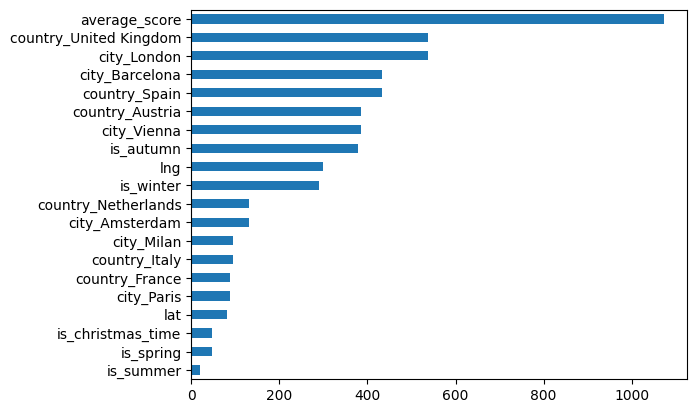

In [34]:
# Используем непараметрический тест хи-квадрат

y=y.astype('int')
from sklearn.feature_selection import chi2 # хи-квадрат
from sklearn.preprocessing import MinMaxScaler

# scale the data to be between 0 and 1
sc = MinMaxScaler()
X_scaled = sc.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=list(X.columns))

imp_cat = pd.Series(chi2(X_scaled[cat_cols], y)[0], index=cat_cols)
imp_cat.sort_values(inplace = True)
imp_cat.plot(kind = 'barh')

Из графика видно, что признак is_summer имеет самое малое влияние на рейтинг отеля.

<Axes: >

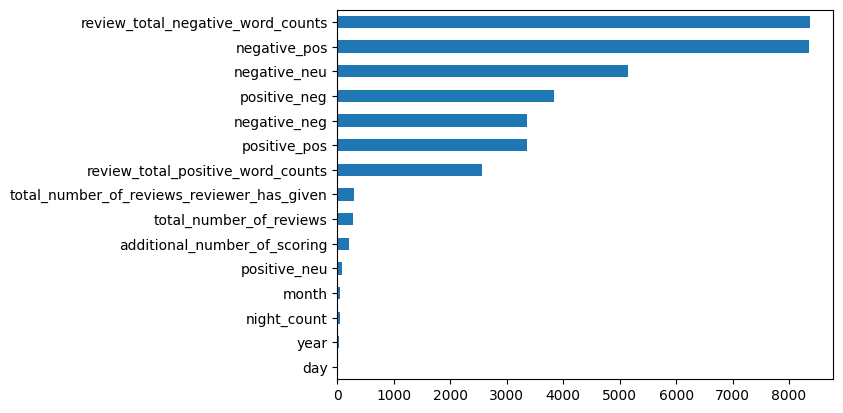

In [35]:
# используем тест ANOVA для непрерывных признаков
from sklearn.feature_selection import f_classif # anova

imp_num = pd.Series(f_classif(X[num_cols], y)[0], index = num_cols)
imp_num.sort_values(inplace = True)
imp_num.plot(kind = 'barh')

Из графика видно, что признак day и negative_pos никак не влияет на оценку отеля.

In [36]:
# посмотрим на пары признаков с сильной корреляцией > 0.7
corr = X.corr().abs().unstack().reset_index()
corr = corr.rename(columns = {'level_0' : 'sign_1', 'level_1' : 'sign_2', 0 : 'correlation' }).sort_values(by = 'correlation', ascending = False)
corr[(corr['sign_1'] != corr['sign_2']) & (corr['correlation'] > 0.7)]

,sign_1,sign_2,correlation
589,city_Barcelona,country_Spain,1.000000
484,country_Spain,city_Barcelona,1.000000
626,city_London,country_United Kingdom,1.000000
552,city_Amsterdam,country_Netherlands,1.000000
659,city_Milan,country_Italy,1.000000
521,country_United Kingdom,city_London,1.000000
344,country_Austria,city_Vienna,1.000000
379,country_France,city_Paris,1.000000
414,country_Italy,city_Milan,1.000000
729,city_Vienna,country_Austria,1.000000


Очевидно по одному признаку из пары имеет смысл попробовать удалить (причём удалять тот, который имеет меньшее влияние на оценку отеля).

In [40]:
cols_to_drop = ['day', 'negative_pos', 'city_Amsterdam', 'city_Barcelona', 'city_London', 'city_Milan', 'city_Paris', 'city_Vienna', \
                 'lng', 'lat', 'additional_number_of_scoring']

<Axes: >

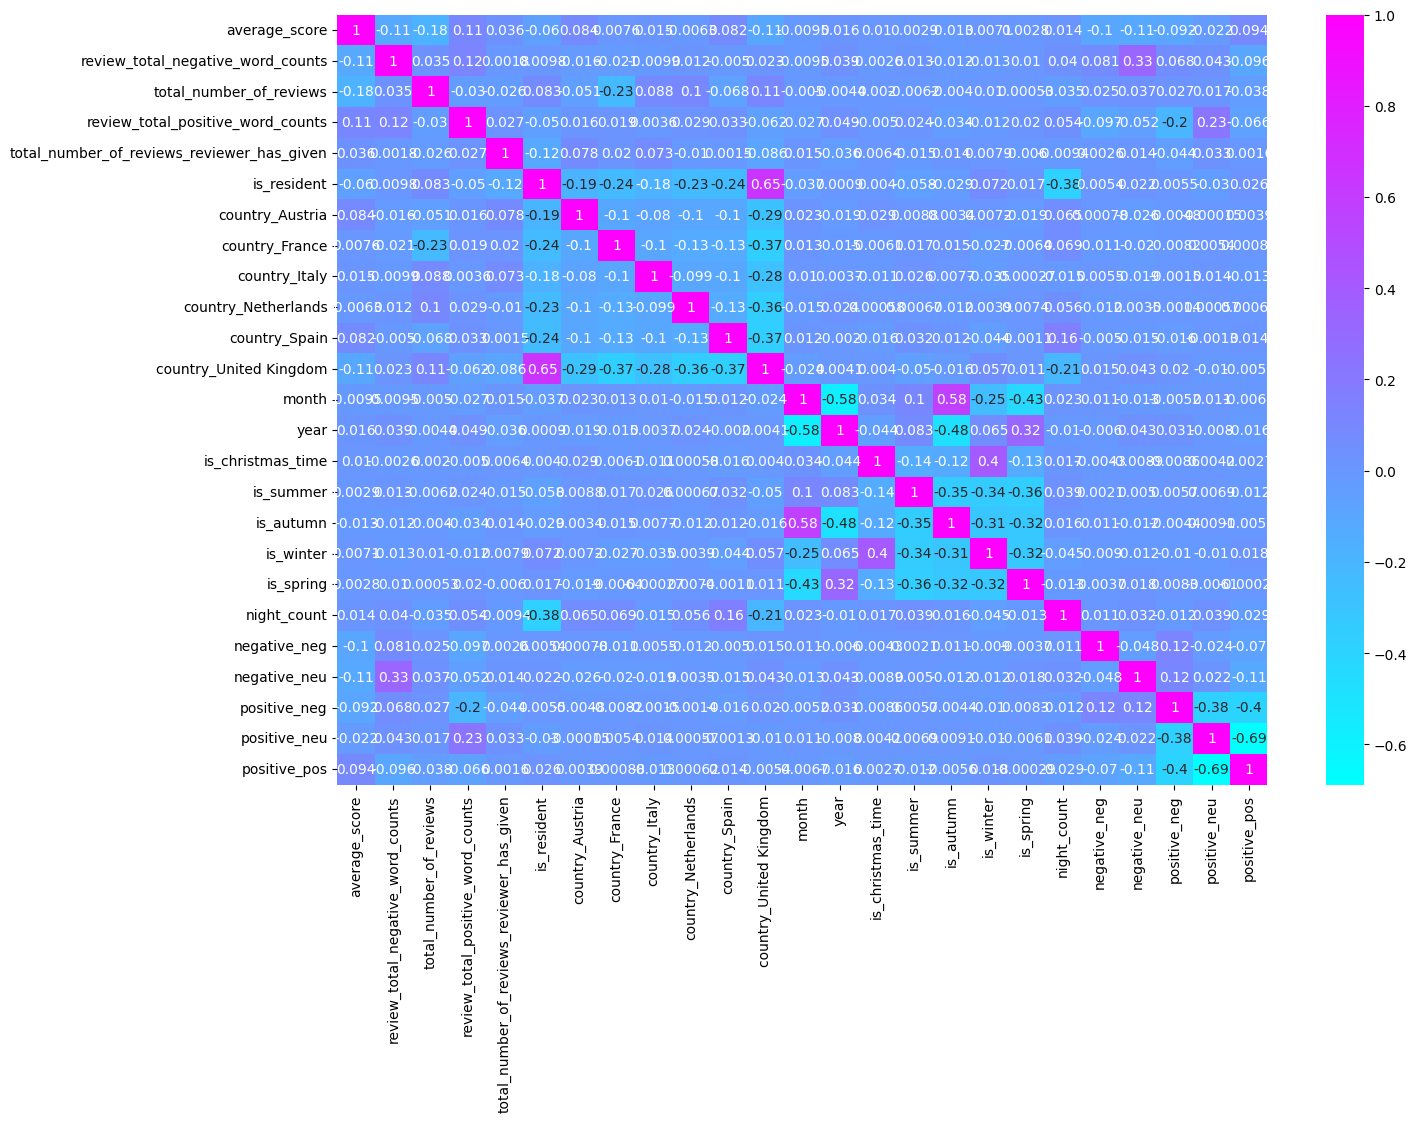

In [41]:
plt.rcParams['figure.figsize'] = (15,10)
sns.heatmap(X.drop(columns=cols_to_drop, axis=1).corr(numeric_only=True), annot=True, cmap='cool')

Судя по тепловой карте сильно коррелирующих признаков более нет, кроме negative_neu и negative_neg, positive_neu и positive_pos. Можно обучать модель.

In [42]:
hotels.drop(columns=cols_to_drop, axis=1, inplace=True)

In [43]:
hotels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 35 columns):
 #   Column                                      Non-Null Count   Dtype         
---  ------                                      --------------   -----         
 0   hotel_address                               515738 non-null  object        
 1   review_date                                 515738 non-null  datetime64[ns]
 2   average_score                               515738 non-null  float64       
 3   hotel_name                                  515738 non-null  object        
 4   reviewer_nationality                        515738 non-null  object        
 5   negative_review                             515738 non-null  object        
 6   review_total_negative_word_counts           515738 non-null  int64         
 7   total_number_of_reviews                     515738 non-null  int64         
 8   positive_review                             515738 non-null  object       

## Обучение модели

In [45]:
# Выделим тестовую часть ещё раз
hotels_train = hotels.query('sample == 1').drop(['sample'], axis=1)
hotels_test = hotels.query('sample == 0').drop(['sample'], axis=1)

hotels_train = hotels_train.select_dtypes(include='number')
hotels_test = hotels_test.select_dtypes(include='number')

y = hotels_train.reviewer_score.values            # наш таргет
X = hotels_train.drop(['reviewer_score'], axis=1)

In [48]:
# всегда фиксируйте RANDOM_SEED, чтобы ваши эксперименты были воспроизводимы!
RANDOM_SEED = 42

In [49]:
# Воспользуемся специальной функцие train_test_split для разбивки тестовых данных
# выделим 20% данных на валидацию (параметр test_size)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

In [50]:
# проверяем
hotels_test.shape, hotels_train.shape, X.shape, X_train.shape, X_test.shape

((128935, 26), (386803, 26), (386803, 25), (309442, 25), (77361, 25))

In [51]:
# Импортируем необходимые библиотеки:
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели
from sklearn import metrics # инструменты для оценки точности модели

In [52]:
# Создаём модель
model = RandomForestRegressor(n_estimators=100, verbose=1, n_jobs=-1, random_state=RANDOM_SEED)

In [53]:
# Обучаем модель на тестовом наборе данных
model.fit(X_train, y_train)

# Используем обученную модель для предсказания рейтинга отелей в тестовой выборке.
# Предсказанные значения записываем в переменную y_pred
y_pred = model.predict(X_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  4.6min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    7.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:   14.8s finished


In [54]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они в среднем отличаются
# Метрика называется Mean Absolute Error (MAE) и показывает среднее отклонение предсказанных значений от фактических.
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))

MAE: 0.8908224937999396


In [55]:
print('MAPE:', metrics.mean_absolute_percentage_error(y_test, y_pred))

MAPE: 0.12697324149754424


<Axes: >

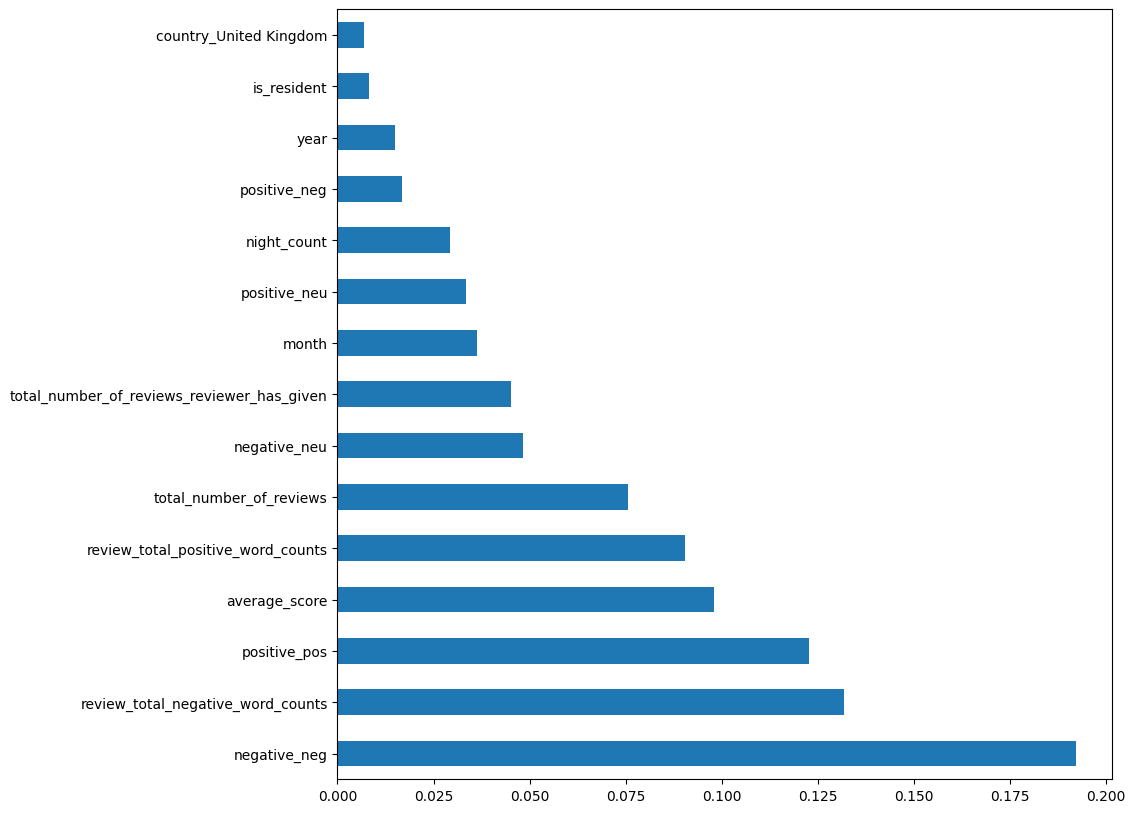

In [56]:
# в RandomForestRegressor есть возможность вывести самые важные признаки для модели
plt.rcParams['figure.figsize'] = (10,10)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')

In [57]:
hotels_test = hotels_test.drop(['reviewer_score'], axis=1)

In [58]:
submission

,reviewer_score,id
0,1,488440
1,10,274649
2,3,374688
3,10,404352
4,9,451596
...,...,...
128930,7,495812
128931,1,315577
128932,3,511968
128933,6,303386


In [59]:
predict_submission = model.predict(hotels_test)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    6.4s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:   15.0s finished


In [61]:
predict_submission

array([8.608, 7.593, 8.118, ..., 8.079, 9.498, 6.566])

In [62]:
list(submission)

['reviewer_score', 'id']

In [63]:
submission['reviewer_score'] = predict_submission
submission.to_csv('submission.csv', index=False)
submission.head(10)

,reviewer_score,id
0,8.608,488440
1,7.593,274649
2,8.118,374688
3,9.758,404352
4,9.654,451596
5,8.982,302161
6,7.827,317079
7,7.638,13963
8,8.057,159785
9,7.333,195089
